In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2


In [5]:
base_path = 'data_EDA'
categories = ['Blue', 'Black', 'White', 'Gray']


# Load Image Metadata

In [6]:
def load_image_metadata(base_path, categories):
    data = []
    for category in categories:
        category_path = os.path.join(base_path, category)
        for filename in os.listdir(category_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(category_path, filename)
                with Image.open(img_path) as img:
                    width, height = img.size
                data.append({
                    'file_name': filename,
                    'category': category,
                    'path': img_path,
                    'width': width,
                    'height': height
                })
    return pd.DataFrame(data)

df = load_image_metadata(base_path, categories)
print(df)


        file_name category                        path  width  height
0      blue_1.jpg     Blue    data_EDA\Blue\blue_1.jpg    474     550
1     blue_10.jpg     Blue   data_EDA\Blue\blue_10.jpg    256     256
2    blue_100.jpg     Blue  data_EDA\Blue\blue_100.jpg    256     256
3     blue_11.jpg     Blue   data_EDA\Blue\blue_11.jpg    474     474
4     blue_12.jpg     Blue   data_EDA\Blue\blue_12.jpg    300     300
..            ...      ...                         ...    ...     ...
366     gray7.jpg     Gray     data_EDA\Gray\gray7.jpg    513     655
367   gray70.jpeg     Gray   data_EDA\Gray\gray70.jpeg   3648    5472
368    gray71.jpg     Gray    data_EDA\Gray\gray71.jpg    626     626
369     gray8.jpg     Gray     data_EDA\Gray\gray8.jpg   2000    2667
370     gray9.jpg     Gray     data_EDA\Gray\gray9.jpg    513     655

[371 rows x 5 columns]


# Statistics

In [7]:
# Number of images per category
print(df['category'].value_counts())

# Image dimensions statistics
print(df[['width', 'height']].describe())


category
Blue     100
Black    100
White    100
Gray      71
Name: count, dtype: int64
             width       height
count   371.000000   371.000000
mean    550.781671   677.908356
std     411.224162   549.108759
min     183.000000   200.000000
25%     474.000000   474.000000
50%     474.000000   632.000000
75%     513.000000   655.000000
max    3648.000000  5472.000000


# Visualization

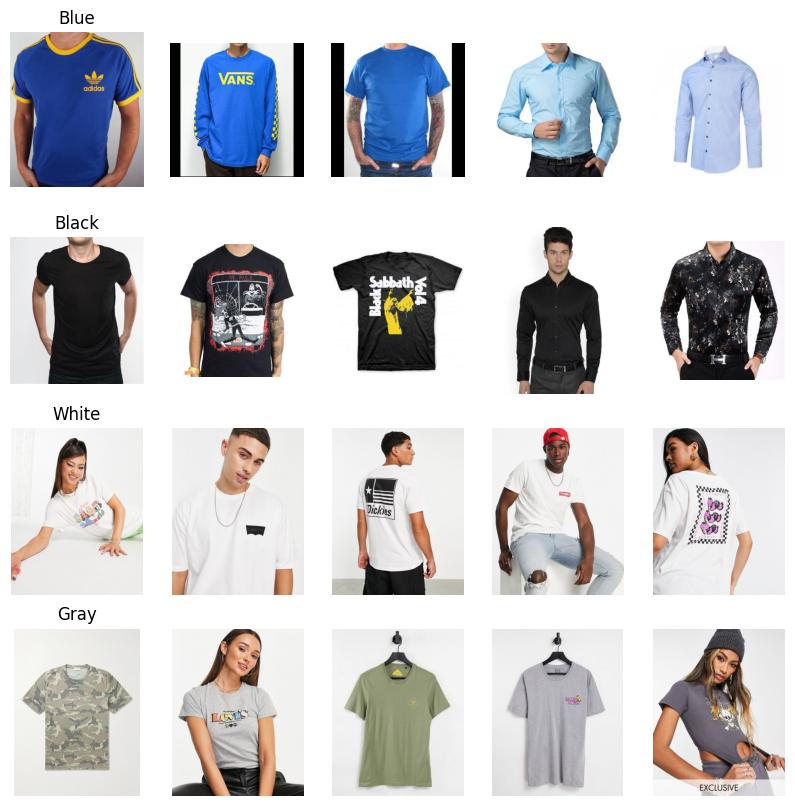

In [8]:
def display_sample_images(df, num_samples=5):
    plt.figure(figsize=(10, 10))
    categories = df['category'].unique()
    for i, category in enumerate(categories):
        plt.subplot(len(categories), num_samples, i * num_samples + 1)
        plt.title(category)
        for j in range(num_samples):
            sample = df[df['category'] == category].iloc[j]
            img = Image.open(sample['path'])
            plt.subplot(len(categories), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

display_sample_images(df)


#  Aspect Ratio Distribution

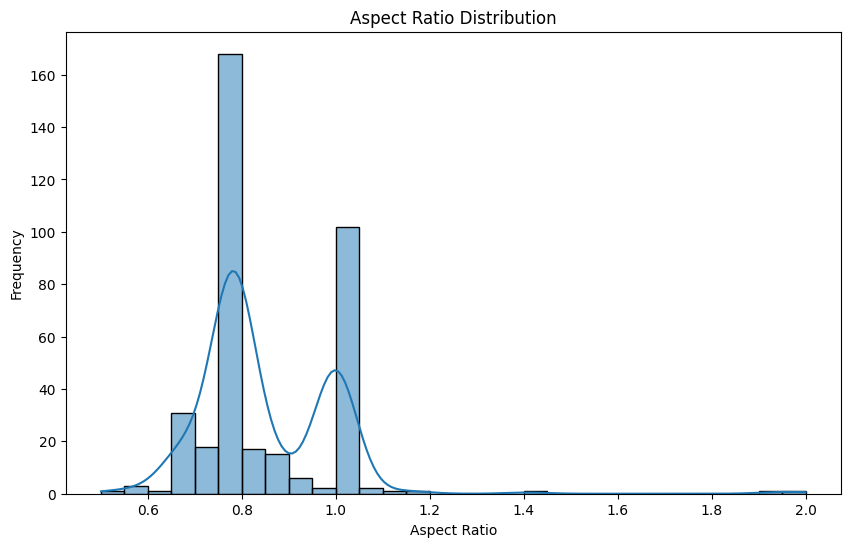

In [9]:
df['aspect_ratio'] = df['width'] / df['height']
plt.figure(figsize=(10, 6))
sns.histplot(df['aspect_ratio'], kde=True, bins=30)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()


# Color Distribution Analysis

In [10]:
def calculate_average_color(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return [np.nan, np.nan, np.nan]  # Handle cases where the image can't be read
    avg_color = img.mean(axis=(0, 1))  # OpenCV uses BGR order
    return avg_color

In [11]:

# Apply the color calculation function
df[['b_avg', 'g_avg', 'r_avg']] = pd.DataFrame(df['path'].apply(calculate_average_color).to_list(), index=df.index)

# Drop rows with NaN values
df = df.dropna(subset=['b_avg', 'g_avg', 'r_avg'])

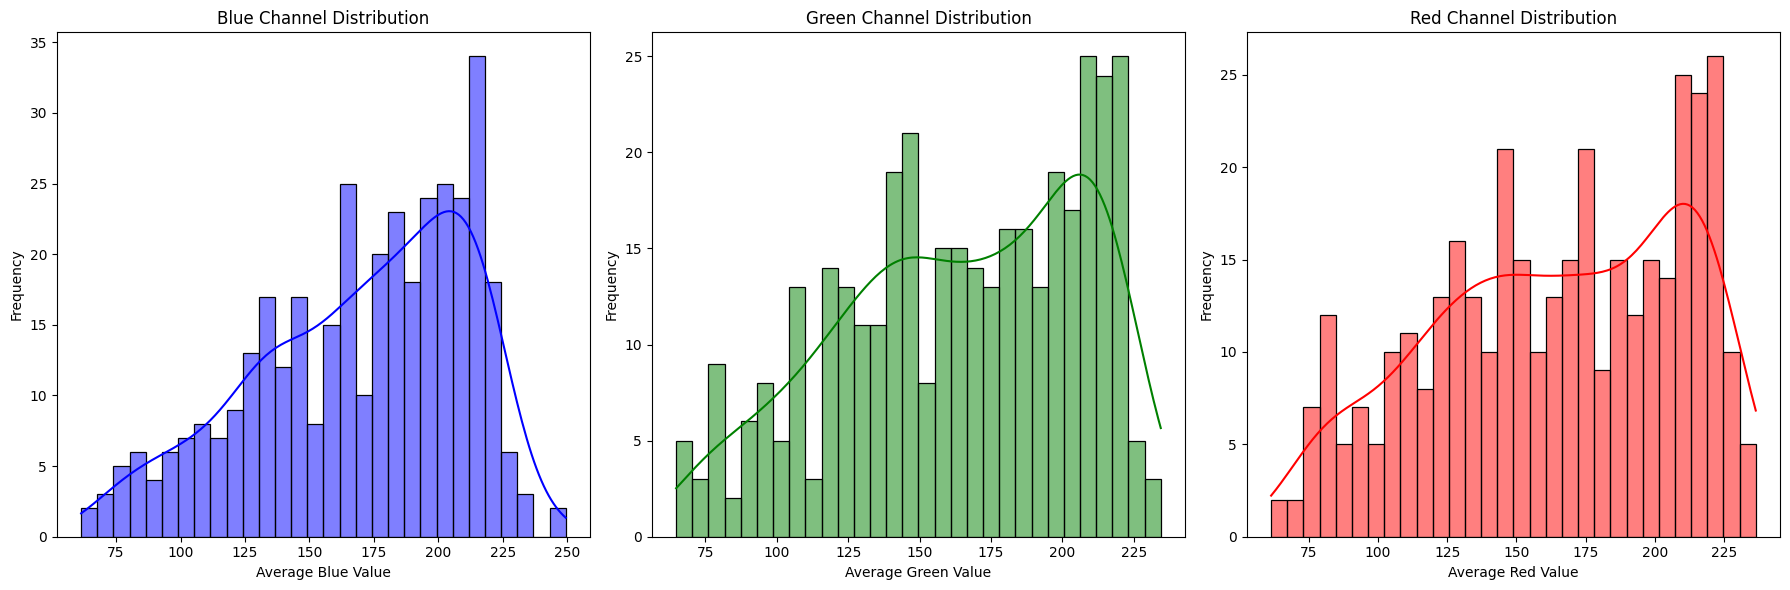

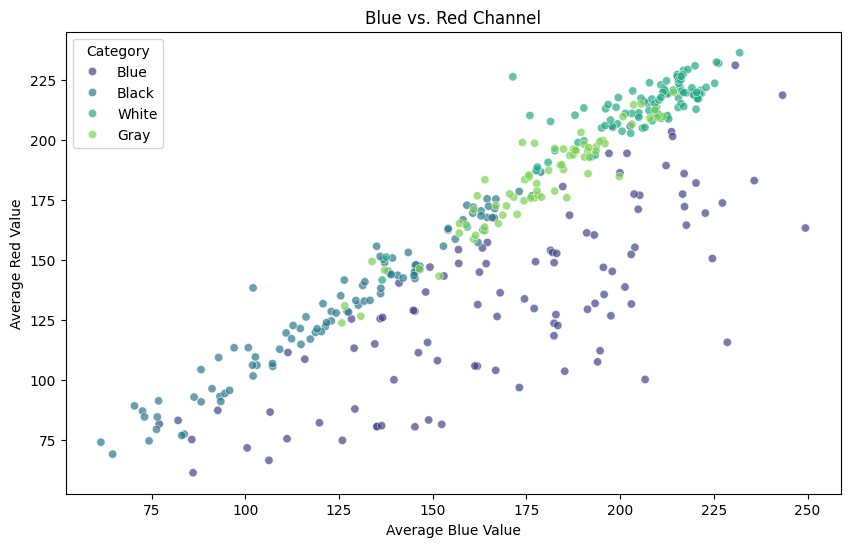

In [12]:
def plot_color_distributions(df):
    plt.figure(figsize=(18, 6))
    
    # Blue channel
    plt.subplot(1, 3, 1)
    sns.histplot(df['b_avg'], kde=True, bins=30, color='blue')
    plt.title('Blue Channel Distribution')
    plt.xlabel('Average Blue Value')
    plt.ylabel('Frequency')

    # Green channel
    plt.subplot(1, 3, 2)
    sns.histplot(df['g_avg'], kde=True, bins=30, color='green')
    plt.title('Green Channel Distribution')
    plt.xlabel('Average Green Value')
    plt.ylabel('Frequency')

    # Red channel
    plt.subplot(1, 3, 3)
    sns.histplot(df['r_avg'], kde=True, bins=30, color='red')
    plt.title('Red Channel Distribution')
    plt.xlabel('Average Red Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_color_distributions(df)

# Scatter plot to analyze color relationships
def plot_color_scatter(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='b_avg', y='r_avg', hue='category', palette='viridis', alpha=0.7)
    plt.title('Blue vs. Red Channel')
    plt.xlabel('Average Blue Value')
    plt.ylabel('Average Red Value')
    plt.legend(title='Category')
    plt.show()

plot_color_scatter(df)